# Introduction

The realm of online dating has witnessed a meteoric rise in recent years, with a plethora of apps utilizing data science to connect individuals seeking companionship or love. These apps provide a treasure trove of insights into human interactions and romantic preferences that were previously unavailable.

This project delves into this rich data landscape, employing machine learning techniques to uncover hidden patterns and relationships within the vast trove of information gathered from OKCupid, a prominent online dating platform. The aim is to extract meaningful insights and develop a predictive model that addresses a specific question related to the dynamics of online dating.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

**Question:**

The question this project hopes to answer is if we can predict someone zodiac sign by other variables from their profile, the hope with this is to find if it is possible for OkCupid to fill in an user zodiac sign in case they didn't, since many people find it important for relationships


**Evaluation:**

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [49]:
df = pd.read_csv('profiles.csv')
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

This is a robust dataset, with 59,946 rows and 31 columns

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And short answers to the following questions:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [50]:
print("Number of categories:",df.sign.nunique())
print("Categories:", df.sign.unique())

Number of categories: 48
Categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

In [51]:
#Cleaning the dataset by keeping just the first word in each description

df['signsCleaned'] = df.sign.str.split().str.get(0)
print("Number of categories:",df.signsCleaned.nunique())
print("categories:", df.signsCleaned.unique())

df.signsCleaned.value_counts()

Number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

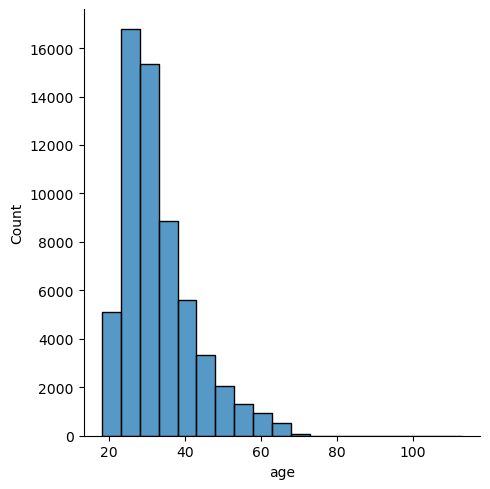

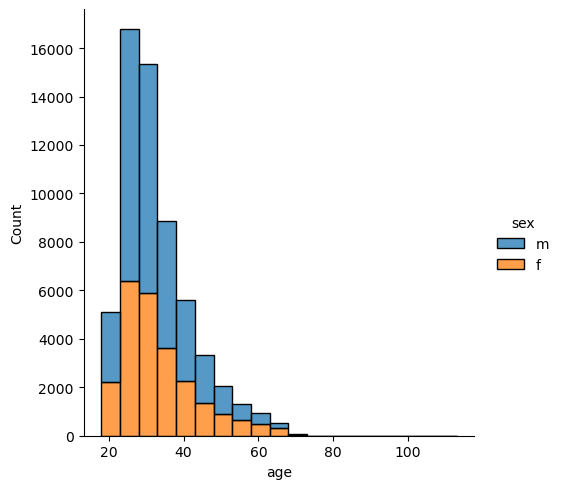

In [52]:
#seeing the age distribution
sns.displot(data=df, x="age", kind="hist", binwidth = 5)
#seeing the same distribution but by gender
sns.displot(data=df, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack")

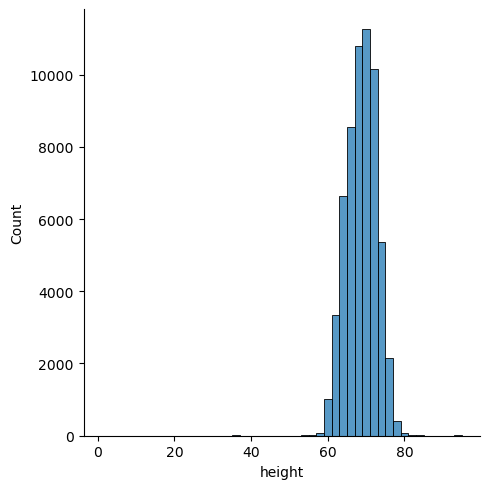

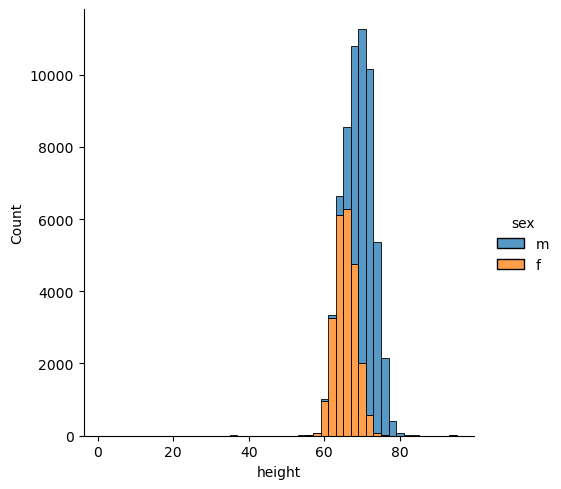

In [53]:
#distribution of height, most people seem to be around 5 feet and 6.5 feet tall
sns.displot(data=df, x="height", kind="hist", binwidth = 2)
#as expected man are taller than woman
sns.displot(data=df, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack")

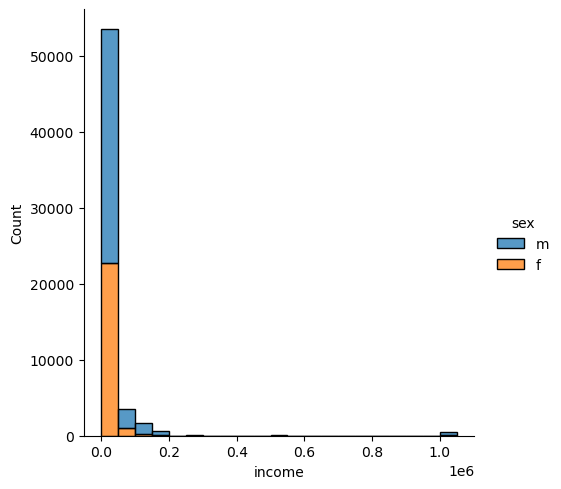

In [54]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");
#it seems like most users weren't willing to talk about their income

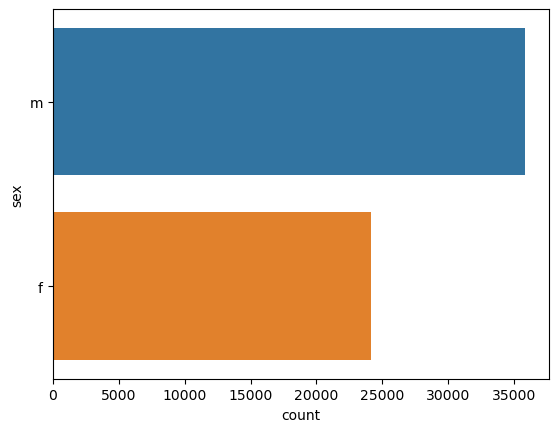

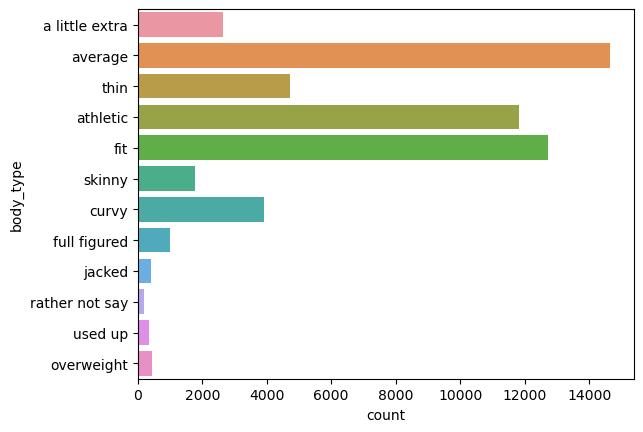

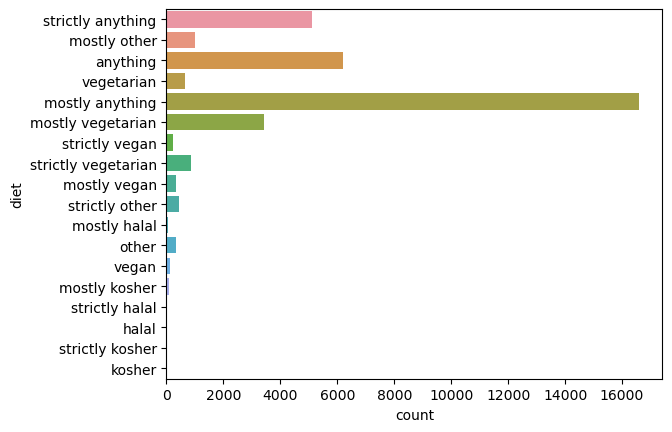

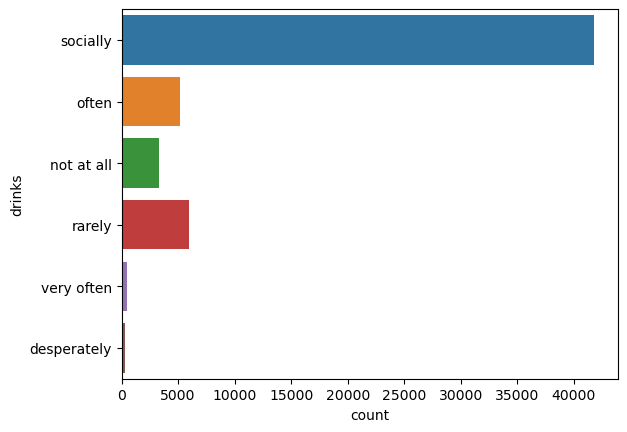

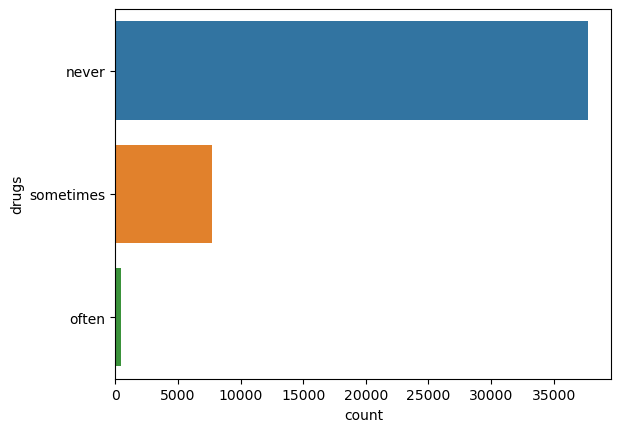

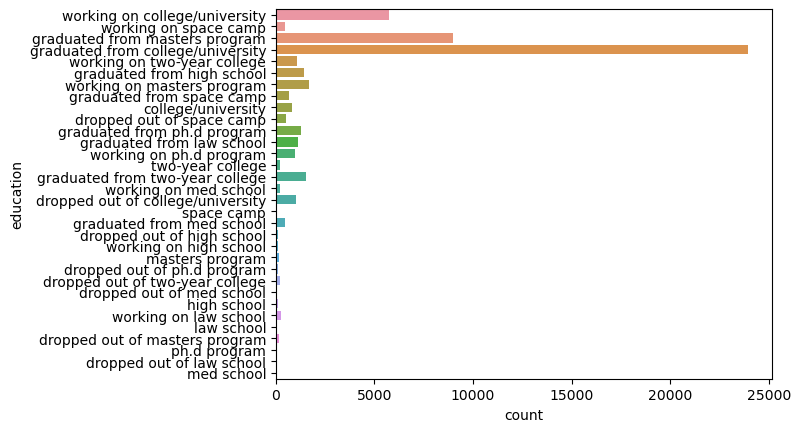

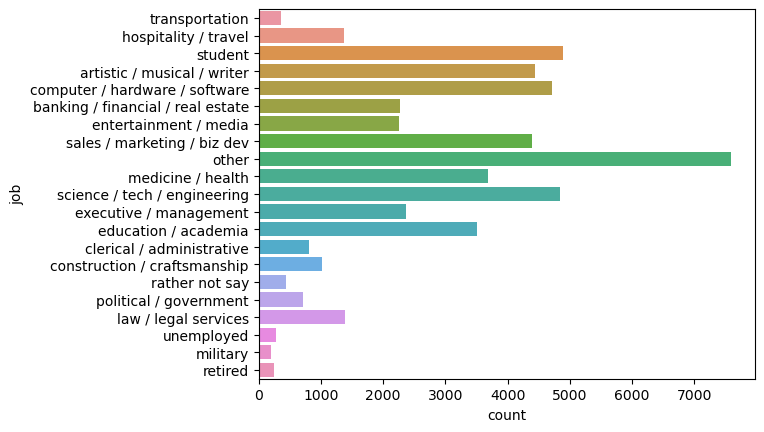

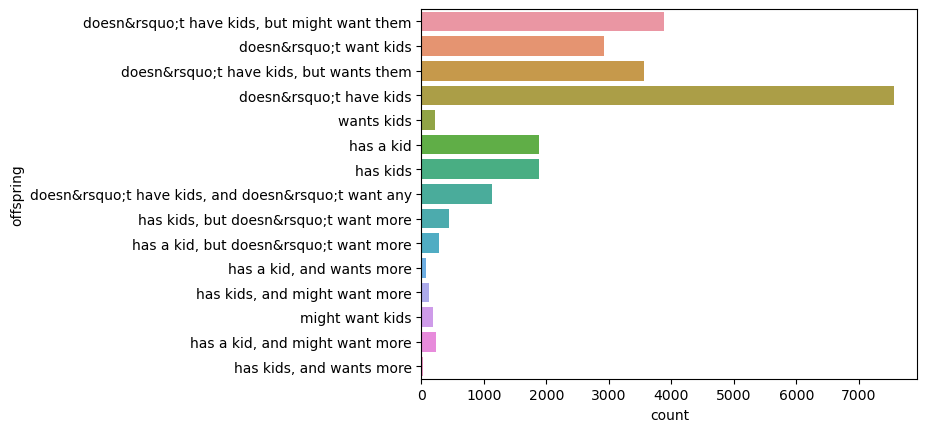

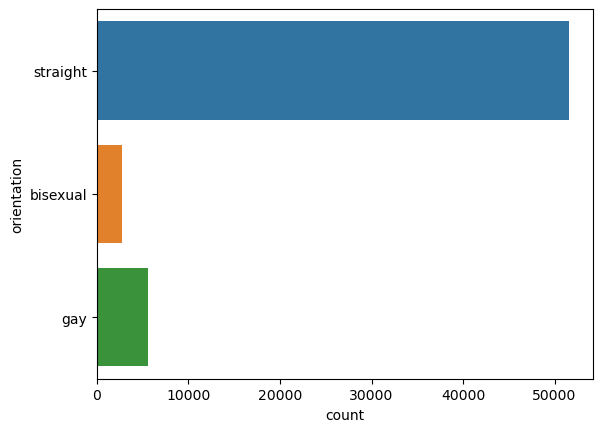

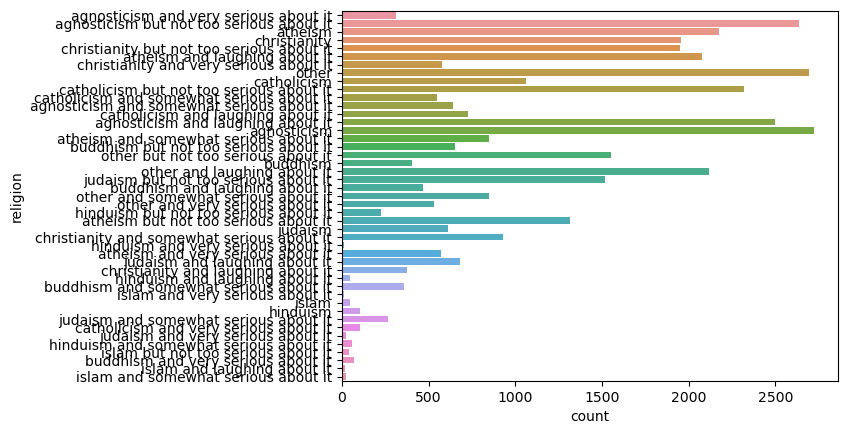

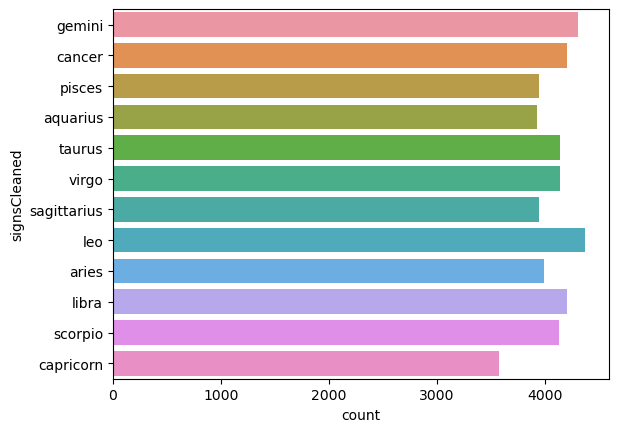

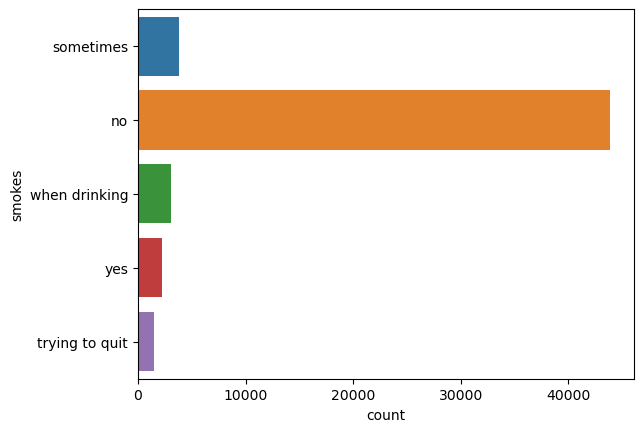

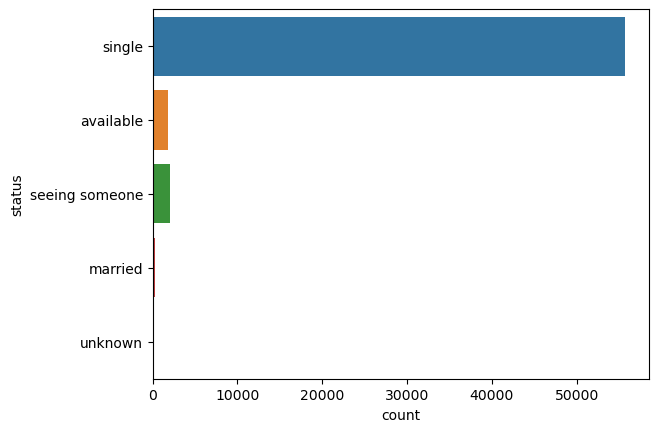

In [55]:
columns = ['sex', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring','orientation', 'religion', 'signsCleaned'
          ,'smokes', 'status']

for column in columns:
    sns.countplot(data=df, y=column)
    plt.show()

Findings from the graphs

**Body Type:**
It seems that most users will describe themselves as average, fit, or athletic.

**Diet:**
Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

**Drinks:**
The majority of the users drink "socially", then "rarely" and "often". 

**Drugs:**
The vast majority of users doesn't use drugs

**Education:**
The majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

**Jobs:**
Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

**Offspring:**
The data suggest that most users do not have kids. 

**Orientation:**
Majority of users are straight

**Pets:**
Dogs are the favorite kind of pets, most users either have dogs or likes thems

**Religion:**
Majority of users aren't very religious being mostly agnostic or atheist

**Signs:**
Leo is the most common while capricorn is the least one

**Smoking:**
The vast majority of people don't smoke

**Relationship Status:**
As expected from a dating site most people aren't in a relationsihp

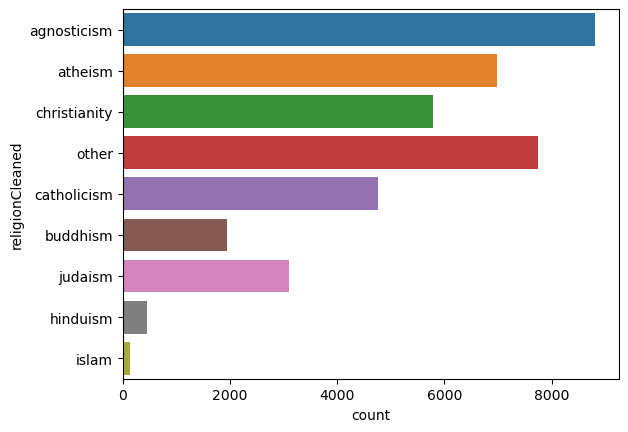

In [56]:
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned");

In [57]:
#Data prepation phase

df.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Preprocessing 

Efficiently preparing the data for modeling is crucial, as it not only accelerates the process but also enhances the quality of the resulting models. Following the principle of "garbage in, garbage out," it's essential to ensure that the data inputted into our modeling phase is of sufficient quality for sharing with others.

The dataset for the model comprises a subset of carefully chosen variables. These variables are selected based on their potential to serve as effective predictors for astrological signs. Variables like age were excluded from the selection, as they are likely not reliable indicators.

In this process, any missing values (na) are eliminated to create a dataset that is complete and ready for analysis.

In [58]:
chosen_cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = df[chosen_cols].dropna()
df.shape


(16453, 8)

In [59]:
#we are left with a fairly robust dataset with 16,543 rows to work with, now we will create dummy variables to create binary
#categories to help our machine learn

for col in chosen_cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])


print(df.head())

  signsCleaned  body_type_a little extra  body_type_athletic  \
0       gemini                         1                   0   
1       cancer                         0                   0   
5       taurus                         0                   0   
7  sagittarius                         0                   0   
9       cancer                         0                   1   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0                  0                0              0                       0   
1                  1                0              0                       0   
5                  1                0              0                       0   
7                  1                0              0                       0   
9                  0                0              0                       0   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0                 0                     0                 

In [83]:
#Splitting the data for training
col_length = len(df.columns)

#Y is the target column, X has the rest
x = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]



x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 10)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#### Model building 

Now it's time to create some models. For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

The models will be evaluated as follows:
- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

In [78]:
# Create a Logistic Regression model with multi-class (multinomial) classification
# Set the maximum number of iterations to 1000 for convergence
lr = LogisticRegression(multi_class="multinomial", max_iter=1000)

# Train the Logistic Regression model on the training data
lr.fit(x_train, y_train)

# Make predictions on the training data using the trained model
lr_pred = lr.predict(x_train)

# Print the classification report to evaluate model performance
print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

    aquarius       0.11      0.06      0.07      1031
       aries       0.12      0.07      0.09      1034
      cancer       0.12      0.23      0.15      1197
   capricorn       0.12      0.05      0.07       966
      gemini       0.12      0.15      0.13      1190
         leo       0.12      0.16      0.14      1197
       libra       0.12      0.10      0.11      1089
      pisces       0.13      0.12      0.12      1077
 sagittarius       0.14      0.11      0.12      1047
     scorpio       0.12      0.05      0.07      1076
      taurus       0.12      0.11      0.12      1112
       virgo       0.13      0.20      0.16      1146

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



Terrible result so far, the model has predicted about 12% correctly, if it was purely down to chance it would be 8%, so we need to improve these results

In [96]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train) 
dtree_pred = dtree.predict(x_train) 


print(classification_report(y_train, dtree_pred))

              precision    recall  f1-score   support

    aquarius       0.64      0.94      0.76      1031
       aries       0.68      0.89      0.77      1034
      cancer       0.70      0.86      0.77      1197
   capricorn       0.72      0.81      0.76       966
      gemini       0.76      0.79      0.78      1190
         leo       0.78      0.79      0.79      1197
       libra       0.81      0.75      0.78      1089
      pisces       0.80      0.73      0.76      1077
 sagittarius       0.87      0.70      0.77      1047
     scorpio       0.91      0.69      0.78      1076
      taurus       0.90      0.68      0.77      1112
       virgo       0.93      0.67      0.78      1146

    accuracy                           0.77     13162
   macro avg       0.79      0.77      0.77     13162
weighted avg       0.79      0.77      0.77     13162



Decision trees are much better at predicting with a global average of 79% 

[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

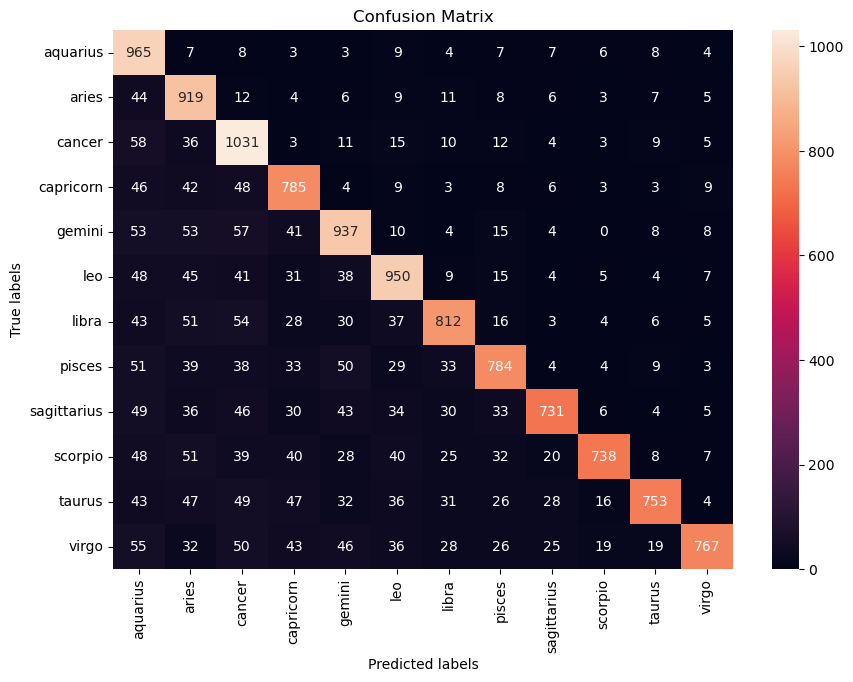

In [108]:
from sklearn.metrics import confusion_matrix 
dtree_cm = confusion_matrix(y_train, dtree_pred)
dtree_labels = dtree.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(dtree_cm, annot=True, ax = ax,fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dtree_labels)
ax.yaxis.set_ticklabels(dtree_labels)

In [110]:
dtree.get_depth()

58

Going back to the model, a quick analysis will show that this tree model has a depth of 58 branches, which will not generalize to another dataset, the model has overfit to the current data.

The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point.

In [113]:
dtree_20 = DecisionTreeClassifier(max_depth = 20)
dtree_20.fit(x_train, y_train) 
dtree_pred_20 = dtree_20.predict(x_train) 


print(classification_report(y_train, dtree_pred_20))

              precision    recall  f1-score   support

    aquarius       0.51      0.30      0.38      1031
       aries       0.31      0.31      0.31      1034
      cancer       0.31      0.35      0.33      1197
   capricorn       0.61      0.23      0.33       966
      gemini       0.21      0.39      0.27      1190
         leo       0.27      0.32      0.29      1197
       libra       0.50      0.25      0.34      1089
      pisces       0.54      0.22      0.32      1077
 sagittarius       0.20      0.35      0.25      1047
     scorpio       0.51      0.22      0.31      1076
      taurus       0.19      0.36      0.25      1112
       virgo       0.41      0.24      0.30      1146

    accuracy                           0.30     13162
   macro avg       0.38      0.30      0.31     13162
weighted avg       0.37      0.30      0.31     13162



The global accuracy is much worse at just 38% with a huge variance between the signs, but this is still better than being overfit by the current data that wouldn't work with in the 'real world'

#### General Comments

This project explored the potential of machine learning to predict the astrological signs of OkCupid users. Given the significance of astrological compatibility in many dating scenarios, an algorithm capable of imputing missing zodiac sign information could have valuable applications in enhancing user matchmaking.

Unfortunately, the machine learning algorithms tested in this study did not outperform random guessing in predicting astrological signs. This suggests that the relationship between user profiles and astrological signs may not be strong enough to be captured effectively through machine learning techniques.

#### Conclusion:

It would be interesting to see if using other data would help predict more effectively users zodiac signs, it would also be very interesting to have the number of matches each person has to try and build the 'ideal candidate' and try to help people that don't get many matches get more